#Travaux Pratiques : Clustering Non Supervisé


# **Dataset iris**

Le dataset Iris est un ensemble de données classique souvent utilisé en apprentissage automatique et en statistiques. Il contient des mesures de 150 fleurs d'iris, réparties en trois espèces : **Iris setosa, Iris versicolor, et Iris virginica**. Chaque fleur est décrite par quatre caractéristiques : la longueur et la largeur des sépales, et la longueur et la largeur des pétales.

**Structure du dataset**

Nombre d'échantillons : 150 (50 par espèce)

Nombre de caractéristiques : 4

Longueur du sépale (en cm)

Largeur du sépale (en cm)

Longueur du pétale (en cm)

Largeur du pétale (en cm)

Variable cible : L'espèce d'iris (3 classes)

##1. Prétraitement des Données

In [34]:
from google.colab import files
import pandas as pd

# Uploader un fichier
uploaded = files.upload()



Saving Iris.csv to Iris (1).csv


In [5]:
df = pd.read_csv("Iris.csv")

1. Aperçu des données

In [6]:

# Afficher les premières lignes
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [7]:
print(df.info())  # Informations sur les colonnes et les types de données
print(df.describe())  # Statistiques descriptives

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000    

 2. Détection des valeurs manquantes


In [8]:
print(df.isnull().sum())  # Compter les valeurs manquantes par colonne


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [9]:
# Traitement des valeurs manquantes (exemple : remplacer par la moyenne)
data_filled = df.fillna(df.select_dtypes(include='number').mean())


3. Détection des outliers



=== Détection des outliers ===


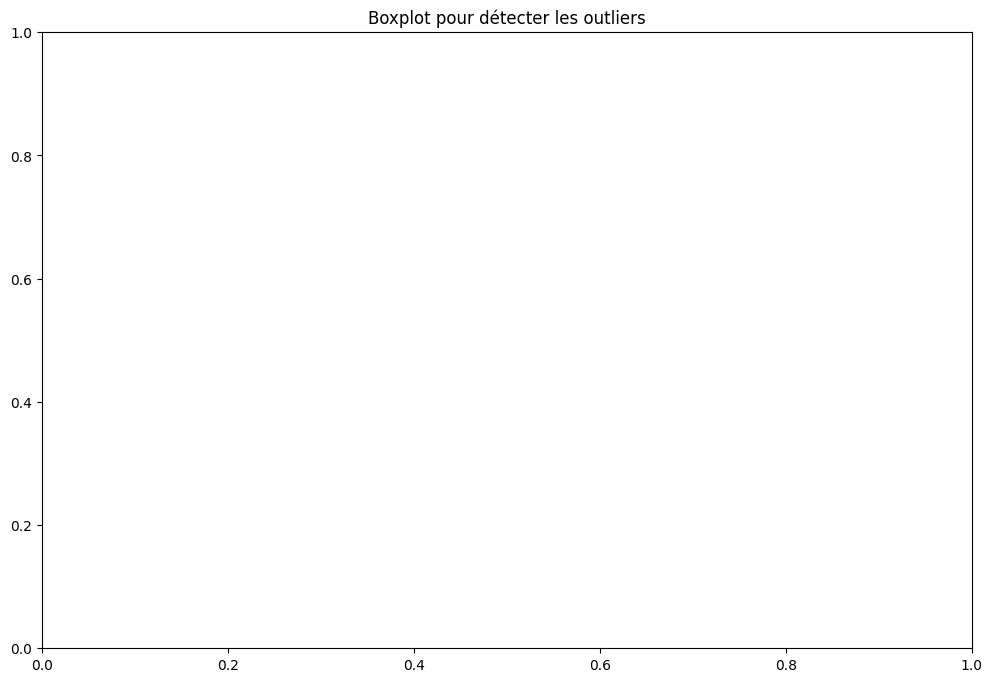

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns

print("\n=== Détection des outliers ===")
plt.figure(figsize=(12, 8))
sns.boxplot(df=data_filled)
plt.title("Boxplot pour détecter les outliers")
plt.show()


In [12]:
 #Détection des outliers avec Z-score
import numpy as np
from scipy import stats
z_scores = np.abs(stats.zscore(data_filled.select_dtypes(include=[np.number])))
outliers = data_filled[(z_scores > 3).any(axis=1)]
print("\nOutliers détectés :")
print(outliers)

# Traitement des outliers (exemple : remplacer par la médiane)
data_no_outliers = data_filled[(z_scores <= 3).all(axis=1)]


Outliers détectés :
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
15  16            5.7           4.4            1.5           0.4  Iris-setosa


 4. Visualisation des données


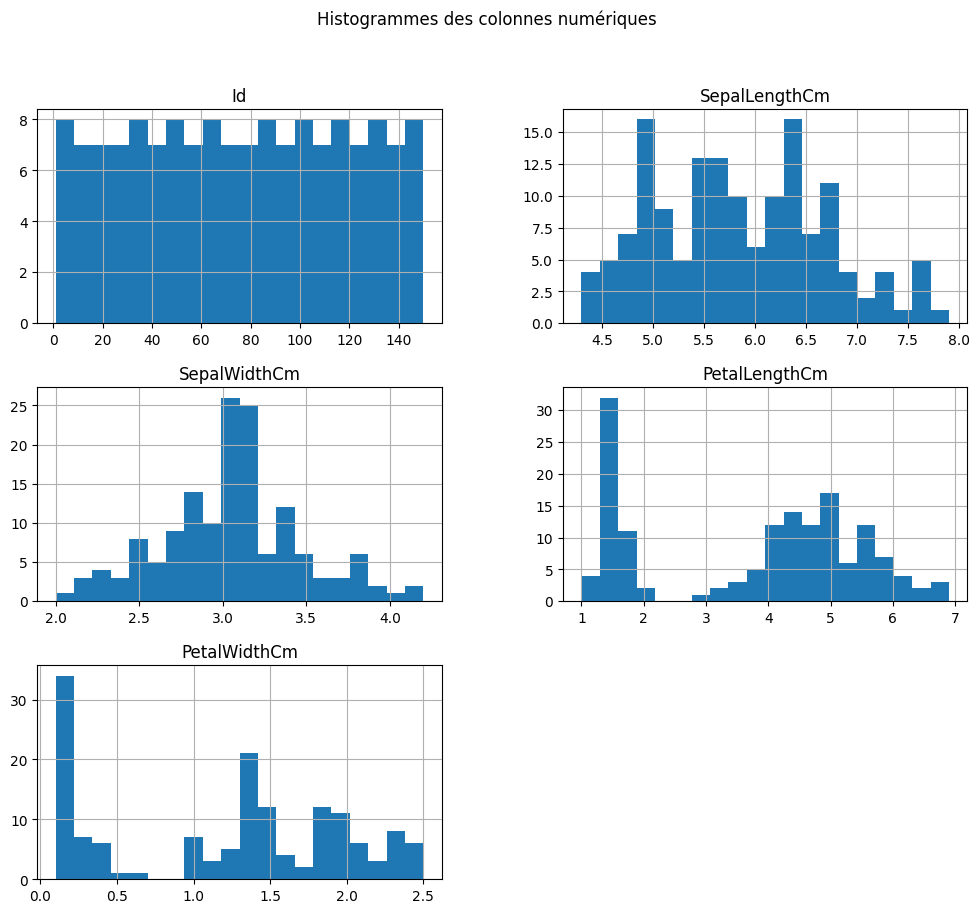

In [13]:
# Histogrammes pour chaque colonne numérique
data_no_outliers.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histogrammes des colonnes numériques")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

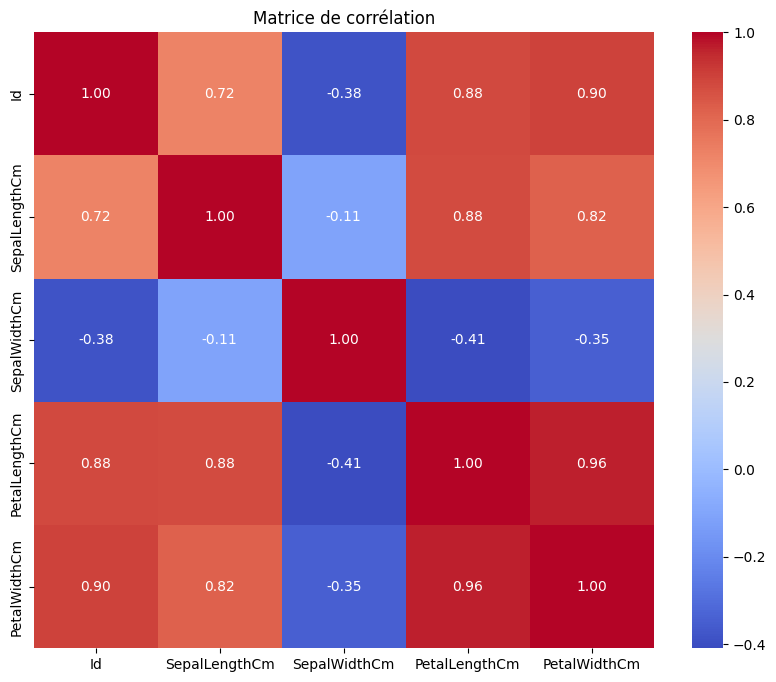

In [14]:
# Sélectionner uniquement les colonnes numériques
numeric_data = data_no_outliers.select_dtypes(include=['number'])

# Calculer la matrice de corrélation
corr_matrix = numeric_data.corr()

# Afficher la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show

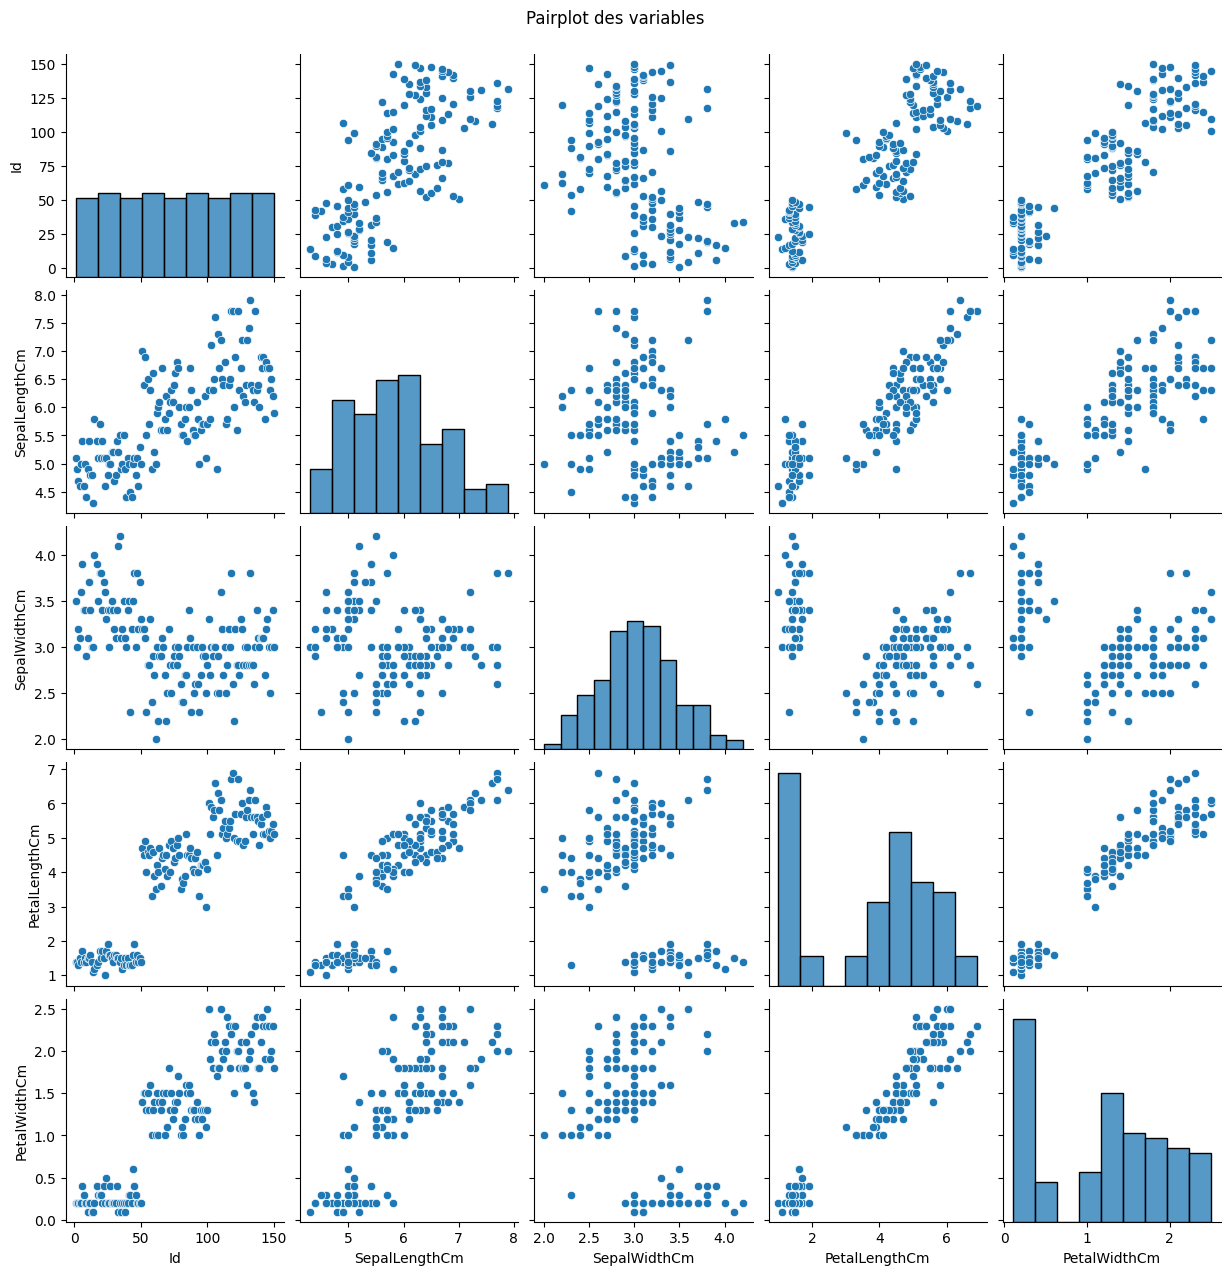

In [15]:
# Pairplot pour visualiser les relations entre les variables
sns.pairplot(data_no_outliers)
plt.suptitle("Pairplot des variables", y=1.02)
plt.show()

 5. Normalisation ou Standardisation des données


In [16]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Sélectionner uniquement les colonnes numériques
numeric_columns = data_no_outliers.select_dtypes(include=['number'])

# Appliquer MinMaxScaler
scaler_minmax = MinMaxScaler()
data_normalized = pd.DataFrame(scaler_minmax.fit_transform(numeric_columns), columns=numeric_columns.columns)

# Afficher les premières lignes du DataFrame normalisé
print(data_normalized.head())


         Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0  0.000000       0.222222      0.681818       0.067797      0.041667
1  0.006711       0.166667      0.454545       0.067797      0.041667
2  0.013423       0.111111      0.545455       0.050847      0.041667
3  0.020134       0.083333      0.500000       0.084746      0.041667
4  0.026846       0.194444      0.727273       0.067797      0.041667


In [ ]:
from sklearn.preprocessing import StandardScaler

# Appliquer StandardScaler
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(numeric_columns), columns=numeric_columns.columns)

# Concaténer avec les colonnes non numériques
data_standardized = pd.concat([data_standardized, data_no_outliers.select_dtypes(exclude=['number'])], axis=1)

print(data_standardized.head())


         Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0 -1.735017      -0.898927      1.085374      -1.352896     -1.320511   
1 -1.711853      -1.140478     -0.107257      -1.352896     -1.320511   
2 -1.688688      -1.382029      0.369796      -1.409888     -1.320511   
3 -1.665523      -1.502804      0.131269      -1.295904     -1.320511   
4 -1.642359      -1.019702      1.323900      -1.352896     -1.320511   

       Species  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  


## 2. Clustering K-means


• Appliquer l’algorithme K-means avec un nombre de clusters défini.


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


<ipython-input-36-ca51e6086e8f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['Cluster'] = clusters


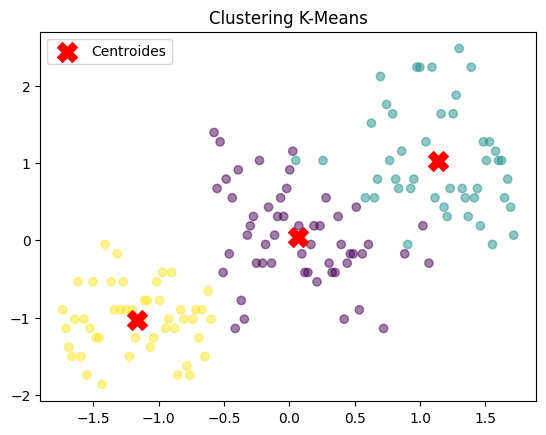

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt


# Sélectionner uniquement les colonnes numériques
numeric_data = data_no_outliers.select_dtypes(include=['number'])

# Standardiser les données (meilleure convergence pour K-Means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

# Définir le nombre de clusters (ex: 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Appliquer K-Means
clusters = kmeans.fit_predict(data_scaled)

# Ajouter les labels des clusters au DataFrame original
data_no_outliers['Cluster'] = clusters

# Afficher les premières lignes avec les clusters
print(data_no_outliers.head())

# Visualisation si les données ont 2 dimensions
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.title("Clustering K-Means")
plt.legend()
plt.show()


• Evaluer la performance du clustering ´


Méthode du coude : pour choisir le nombre optimal de clusters.

---



Cette méthode aide à déterminer le nombre optimal de clusters en analysant l'inertie (somme des carrés des distances entre chaque point et son centroïde). Idéalement, il faut choisir k à l'endroit où l'inertie commence à diminuer moins rapidement.

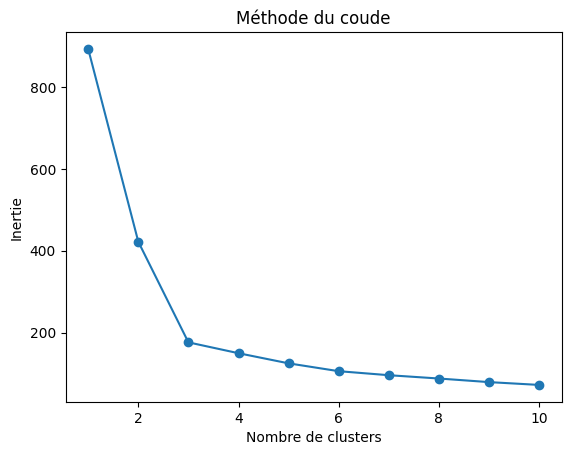

In [ ]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)

# Tracer l'inertie en fonction de k
plt.plot(range(1, 11), inertias, marker='o')
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.show()


Silhouette Score : pour évaluer la cohésion et la séparation des clusters.


---
Si le Silhouette Score est élevé, cela signifie que les clusters sont bien définis.

Si le score est proche de 0 ou négatif, cela indique que les clusters se chevauchent ou que le nombre de clusters choisi n'est pas optimal.



In [ ]:
from sklearn.metrics import silhouette_score

# Calcul du Silhouette Score
score = silhouette_score(data_scaled, clusters)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.5941353771948215


Davies-Bouldin Index : pour mesurer la compacité et la séparation des clusters.


---
Une valeur plus faible indique des clusters bien séparés et compacts.



In [ ]:
from sklearn.metrics import davies_bouldin_score

# Calcul de l'indice de Davies-Bouldin
db_index = davies_bouldin_score(data_scaled, clusters)
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.6278981600056797


PCA : pour visualiser les clusters dans un espace 2D.


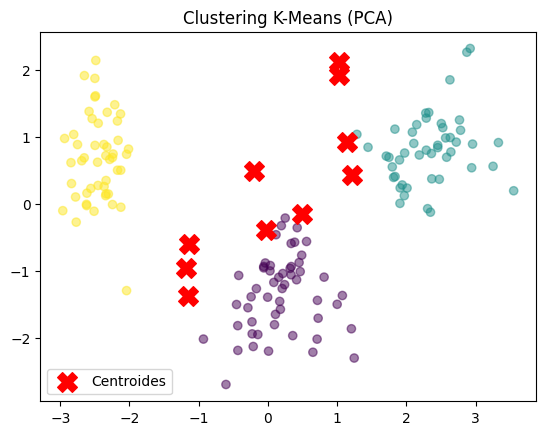

In [ ]:
from sklearn.decomposition import PCA

# Réduction de la dimension à 2 avec PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Visualisation des clusters
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.title("Clustering K-Means (PCA)")
plt.legend()
plt.show()


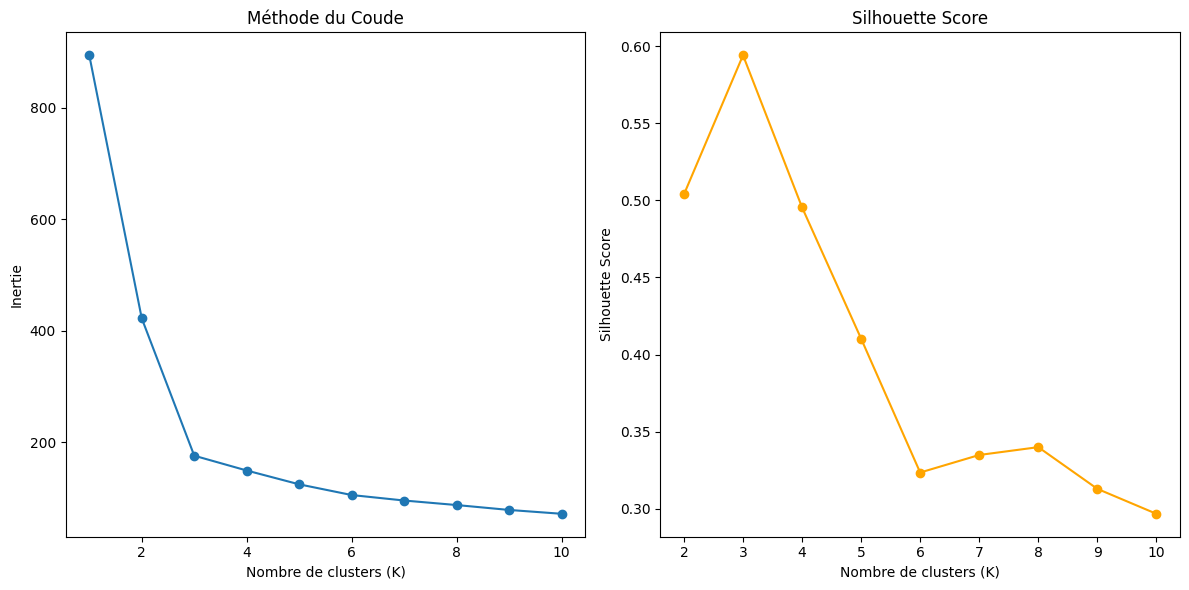

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Sélectionner uniquement les colonnes numériques
numeric_data = data_no_outliers.select_dtypes(include=['number'])

# Standardiser les données (meilleure convergence pour K-Means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

# Initialiser les listes pour stocker les résultats
inertias = []  # pour la méthode du coude
silhouette_scores = []  # pour les scores de silhouette
k_values = range(1, 11)  # Tester les valeurs de K de 1 à 10

# Testons différentes valeurs de K et calculons les métriques
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)

    # Méthode du coude : inertie
    inertias.append(kmeans.inertia_)

    # Silhouette Score
    if k > 1:  # Le silhouette score est défini que pour k > 1
        silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Tracer la méthode du coude (inertie)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker='o')
plt.title("Méthode du Coude")
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Inertie")

# Tracer le Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values[1:], silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score")
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()



<ipython-input-19-0d918f568847>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['Cluster'] = clusters_optimal


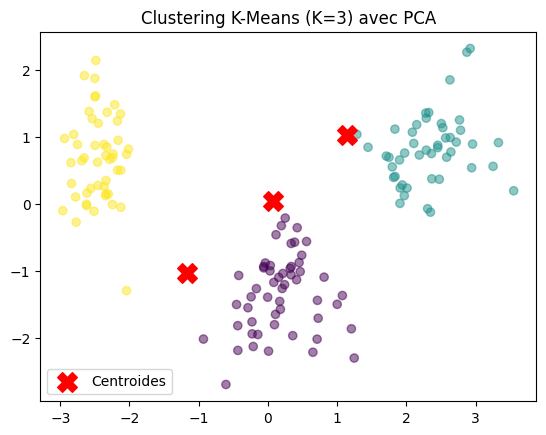

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


In [19]:
# Interprétation des résultats : sélection de K optimal

#Les deux métriques suggèrent que K=3 est un bon candidat pour le nombre optimal de clusters.

# Appliquons K-means pour K optimal
optimal_k = 3  # basé sur les graphiques ci-dessus
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters_optimal = kmeans_optimal.fit_predict(data_scaled)

# Ajouter les labels des clusters au DataFrame original
data_no_outliers['Cluster'] = clusters_optimal

# Visualiser les clusters avec PCA si les données sont multidimensionnelles
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Visualisation des clusters
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_optimal, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.title(f"Clustering K-Means (K={optimal_k}) avec PCA")
plt.legend()
plt.show()

# Afficher les premières lignes avec les clusters
print(data_no_outliers.head())


##Clustering Hiérarchique


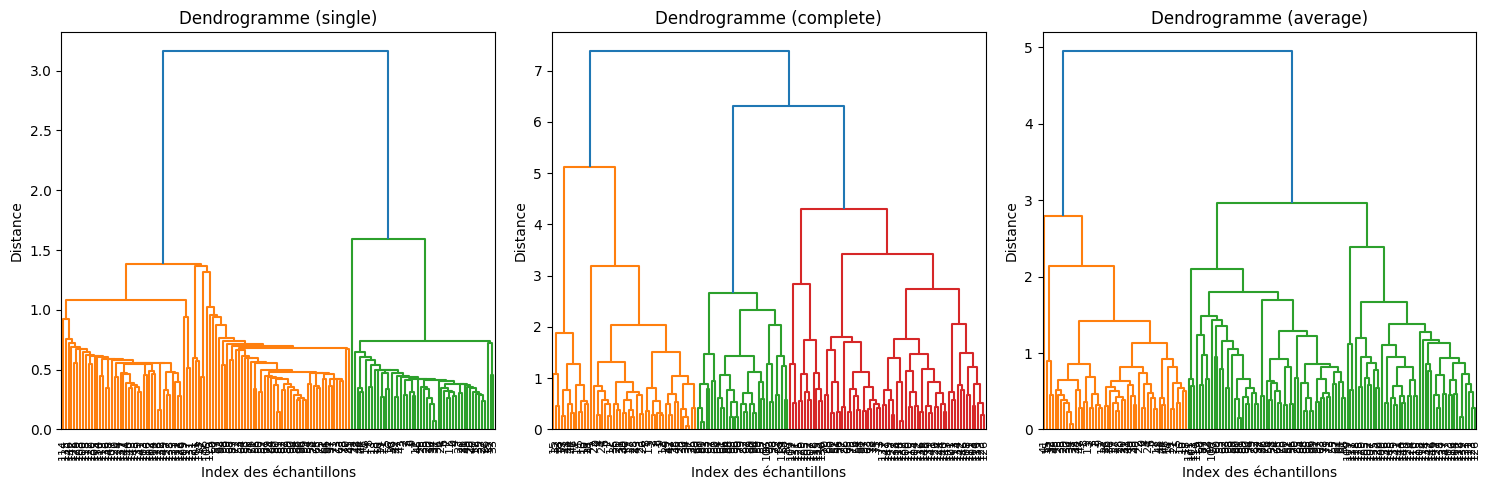

   Cluster_Hierarchique  Cluster_KMeans
0                     1               1
1                     1               1
2                     1               1
3                     1               1
4                     1               1


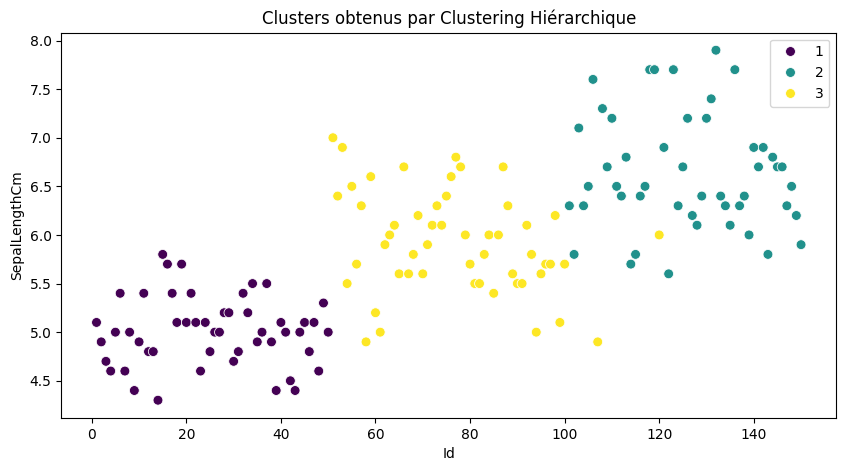

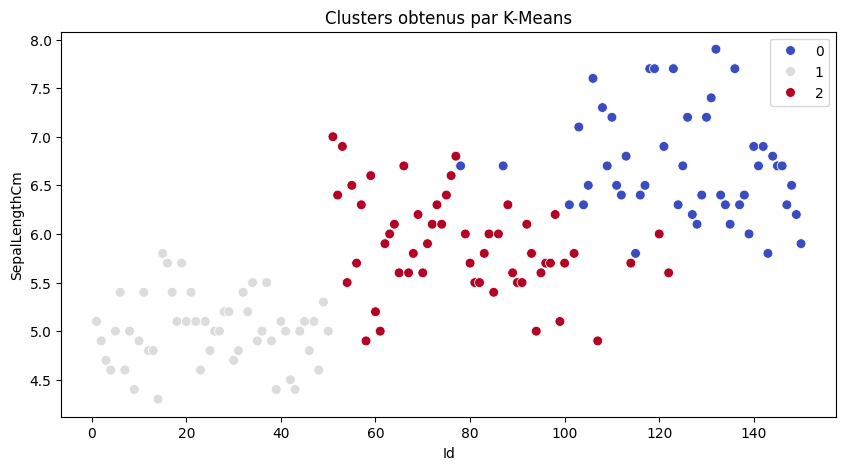

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1️⃣ Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# 2️⃣ Normaliser les données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# 3️⃣ Appliquer différents types de clustering hiérarchique
methods = ['single', 'complete', 'average']

plt.figure(figsize=(15, 5))
for i, method in enumerate(methods, 1):
    plt.subplot(1, 3, i)
    linkage_matrix = linkage(df_scaled, method=method)
    dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90, leaf_font_size=8)
    plt.title(f"Dendrogramme ({method})")
    plt.xlabel("Index des échantillons")
    plt.ylabel("Distance")

plt.tight_layout()
plt.show()

# 4️⃣ Déterminer le nombre optimal de clusters et affecter les échantillons
num_clusters = 3
linkage_matrix = linkage(df_scaled, method='ward')  # Utilisation de Ward pour minimiser la variance intra-cluster
clusters_hierarchical = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Ajouter les clusters au DataFrame
df['Cluster_Hierarchique'] = clusters_hierarchical

# 5️⃣ Comparer avec K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

# 6️⃣ Afficher la comparaison des clusters
print(df[['Cluster_Hierarchique', 'Cluster_KMeans']].head())

# 7️⃣ Visualisation des clusters

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_numeric.iloc[:, 0], y=df_numeric.iloc[:, 1], hue=df['Cluster_Hierarchique'], palette='viridis', s=50)
plt.title("Clusters obtenus par Clustering Hiérarchique")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_numeric.iloc[:, 0], y=df_numeric.iloc[:, 1], hue=df['Cluster_KMeans'], palette='coolwarm', s=50)
plt.title("Clusters obtenus par K-Means")
plt.legend()
plt.show()


##  Clustering DBSCAN


Nombre de clusters détectés (hors bruit) : 4
Nombre de points considérés comme du bruit : 100


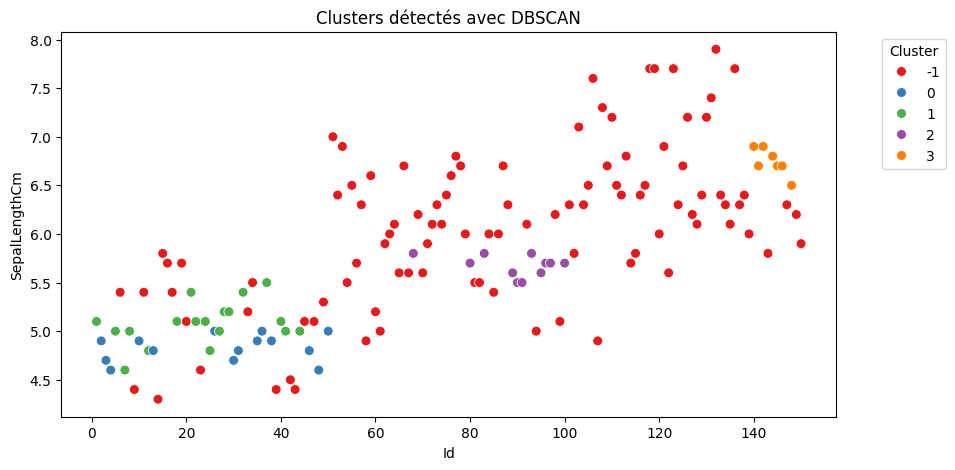

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 1️⃣ Sélectionner les colonnes numériques uniquement
df_numeric = df.select_dtypes(include=[np.number])

# 2️⃣ Normalisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# 3️⃣ Appliquer DBSCAN avec des paramètres initiaux
epsilon = 0.5  # Distance maximale entre deux points d'un même cluster
min_samples = 5  # Nombre minimum de points dans un cluster
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
df['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled)

# 4️⃣ Identifier les points de bruit (-1 signifie bruit)
noise_points = df[df['Cluster_DBSCAN'] == -1]

# 5️⃣ Afficher les résultats
print("Nombre de clusters détectés (hors bruit) :", len(set(df['Cluster_DBSCAN'])) - (1 if -1 in df['Cluster_DBSCAN'].values else 0))
print("Nombre de points considérés comme du bruit :", len(noise_points))

# 6️⃣ Visualiser les clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_numeric.iloc[:, 0], y=df_numeric.iloc[:, 1], hue=df['Cluster_DBSCAN'], palette='Set1', s=50)
plt.title("Clusters détectés avec DBSCAN")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##Analyse et Interprétation


**Les résultats des différents algorithmes de clustering**

1. Clustering K-means

Résultats :

Méthode du coude : Le graphique de l'inertie en fonction du nombre de clusters suggère que k=3 est un choix optimal, car c'est à ce point que la diminution de l'inertie commence à ralentir.

Silhouette Score : Pour k=3, le score de silhouette est relativement élevé, indiquant que les clusters sont bien séparés et cohérents.

Visualisation avec PCA : La projection des clusters dans un espace 2D montre une séparation claire entre les trois groupes, avec des centroïdes bien positionnés.


2. Clustering Hiérarchique

Résultats :

Dendrogrammes : Les dendrogrammes pour les méthodes single, complete, et average montrent des structures de clustering différentes.

Comparaison avec K-means : Les clusters obtenus par clustering hiérarchique sont similaires à ceux de K-means, mais avec des différences mineures dans l'affectation des points aux clusters.


3. Clustering DBSCAN

Résultats :

Nombre de clusters détectés : DBSCAN a détecté un nombre variable de clusters en fonction des paramètres epsilon et min_samples. Certains points ont été classés comme bruit (cluster -1).

Visualisation : Les clusters détectés par DBSCAN montrent une séparation moins claire que K-means ou le clustering hiérarchique, surtout si les paramètres ne sont pas optimaux.

**Avantages et inconvénients de chaque méthode**

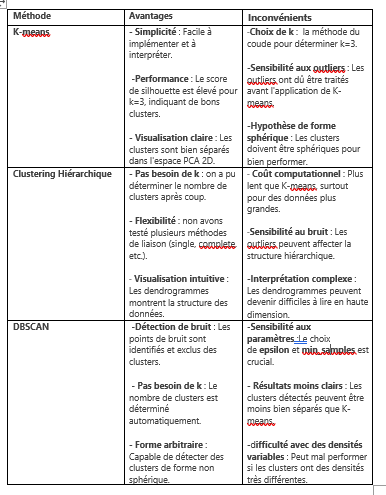

**Améliorations possibles pour chaque approche**

**1. Améliorations pour K-means**

a. Utilisation de K-means++ pour l'initialisation :

Problème : K-means standard peut converger vers des minima locaux en raison d'une mauvaise initialisation des centroïdes.

Solution : Utiliser K-means++, qui initialise les centroïdes de manière plus intelligente pour améliorer la convergence et la qualité des clusters.

b. Clustering semi-supervisé :

Problème : K-means est entièrement non supervisé, ce qui peut limiter sa performance si certaines informations sont disponibles.

Solution : Intégrer des informations partielles (par exemple, quelques étiquettes de classe) pour guider le clustering (semi-supervisé).

c. Utilisation de noyaux (Kernel K-means) :

Problème : K-means suppose que les clusters sont linéairement séparables.

Solution : Appliquer Kernel K-means pour capturer des clusters non linéaires en utilisant des fonctions de noyau (par exemple, RBF).

d. Validation croisée pour le choix de k :

Problème : La méthode du coude et le score de silhouette peuvent être subjectifs.

Solution : Utiliser une validation croisée pour évaluer la stabilité des clusters pour différentes valeurs de k.

**2. Améliorations pour le Clustering Hiérarchique**

a. Utilisation de distances personnalisées :

Problème : Les distances euclidiennes peuvent ne pas être adaptées à certaines données.

Solution : Utiliser des mesures de distance personnalisées (par exemple, distance de Mahalanobis, distance cosinus) pour mieux capturer les similarités entre les points.

b. Découpage dynamique du dendrogramme :

Problème : Le choix du nombre de clusters en coupant le dendrogramme à une hauteur fixe peut être arbitraire.

Solution : Utiliser des méthodes dynamiques pour déterminer où couper le dendrogramme (par exemple, en maximisant la stabilité des clusters).

c. Combinaison avec d'autres méthodes :

Problème : Le clustering hiérarchique peut être lent et peu adapté aux grands jeux de données.

Solution : Combiner avec K-means ou DBSCAN pour pré-clusteriser les données et appliquer le clustering hiérarchique sur les sous-ensembles.

d. Clustering hiérarchique divisif :

Problème : Le clustering hiérarchique agglomératif (utilisé ici) commence par des points individuels, ce qui peut être inefficace.

Solution : Utiliser le clustering hiérarchique divisif, qui commence par un seul cluster et le divise progressivement.

**3. Améliorations pour DBSCAN**

a. Optimisation automatique des paramètres :


Problème : Le choix de epsilon et min_samples est crucial et souvent manuel.

Solution : Utiliser des méthodes d'optimisation automatique (par exemple, recherche par grille ou courbe de voisinage) pour trouver les meilleurs paramètres.

b. DBSCAN adaptatif :

Problème : DBSCAN standard ne gère pas bien les clusters de densités variables.

Solution : Utiliser des variantes comme OPTICS ou HDBSCAN, qui sont plus adaptées aux données avec des densités variables.

c. Combinaison avec d'autres méthodes :

Problème : DBSCAN peut mal performer sur des données de haute dimension.

Solution : Appliquer une réduction de dimension (par exemple, PCA, UMAP) avant DBSCAN pour améliorer la détection des clusters.

d. DBSCAN pondéré :

Problème : DBSCAN traite tous les points de manière égale, ce qui peut ne pas être optimal.

Solution : Utiliser une version pondérée de DBSCAN, où certains points ont plus d'importance que d'autres.

# **Dataset Mall_Customers**



le dataset "Mall Customers",  contient des informations sur les clients d'un centre commercial. Ce dataset est idéal pour le clustering non supervisé, car il permet de segmenter les clients en fonction de leurs comportements d'achat.

**Description du dataset :**

CustomerID : Identifiant unique du client

Gender : Sexe du client (Male/Female)

Age : Âge du client

Annual Income (k$) : Revenu annuel en milliers de dollars

Spending Score (1-100) : Score de dépense attribué au client, basé sur son comportement d'achat.

Ce dataset est pertinent car :

Il permet d'explorer le clustering en fonction de plusieurs caractéristiques (âge, revenu, score de dépense).

Les différentes méthodes de clustering peuvent donner des résultats intéressants en segmentant les clients selon leurs habitudes d'achat.

## 1. Pretraitement des Donnees

In [33]:
from google.colab import files
import pandas as pd

# Uploader un fichier
uploaded = files.upload()



Saving Mall_Customers.csv to Mall_Customers.csv


In [38]:
df2=pd.read_csv("Mall_Customers.csv")# Charger le dataset


In [41]:
display(df2.head()) # Afficher les premières lignes



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Analyse exploratoire**

In [40]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [45]:
# Détection des valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

Valeurs manquantes par colonne :
 Id                      0
SepalLengthCm           0
SepalWidthCm            0
PetalLengthCm           0
PetalWidthCm            0
Species                 0
Cluster_Hierarchique    0
Cluster_KMeans          0
Cluster_DBSCAN          0
dtype: int64


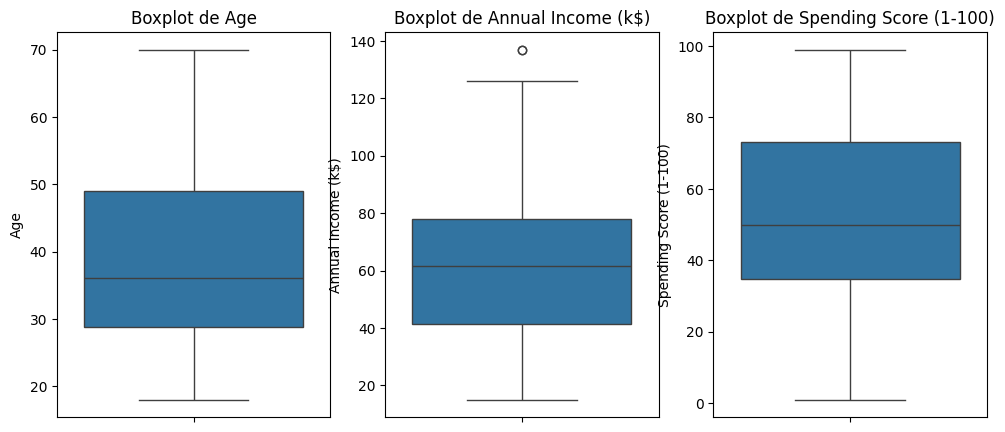

In [47]:
#Détection des outliers avec boxplots
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
for i, column in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df2[column])
    plt.title(f"Boxplot de {column}")
plt.show()

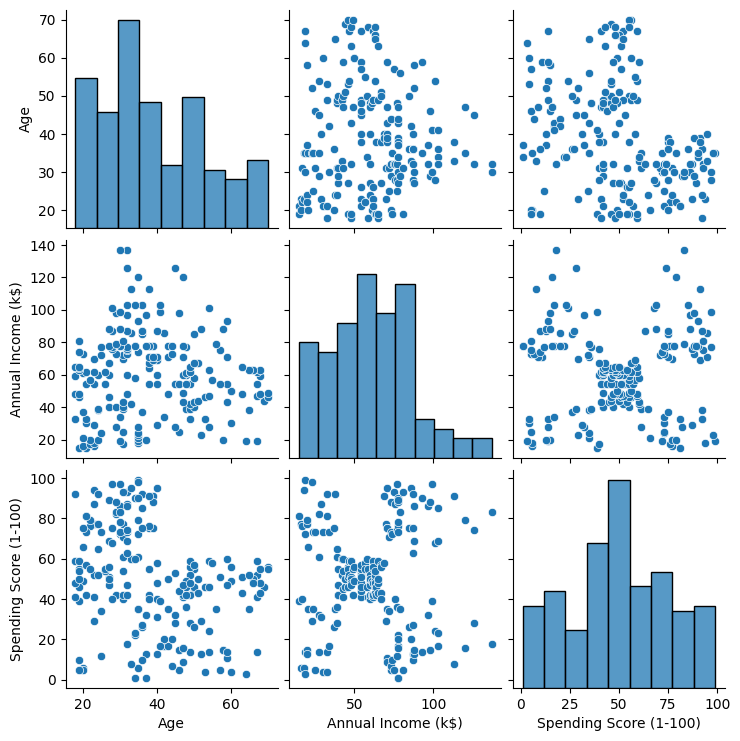

In [43]:
# Visualisation des distributions
sns.pairplot(df2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

In [44]:

# Standardisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

## 2. Clustering K-means


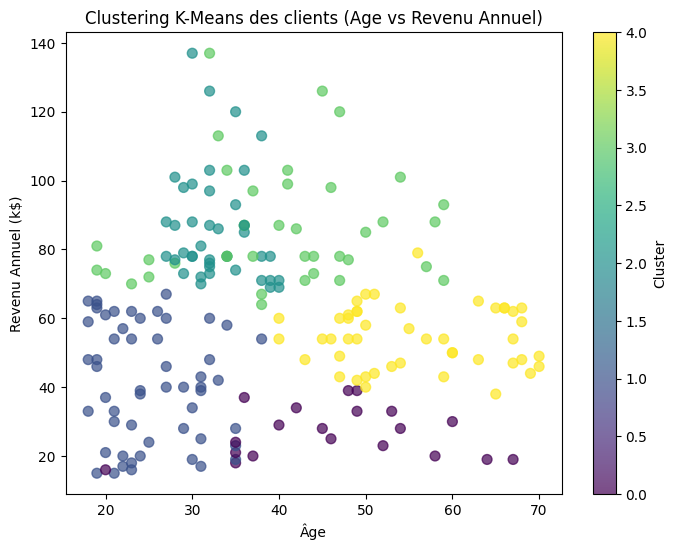

In [64]:
# Appliquer K-Means avec un nombre défini de clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df2['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# Visualisation des clusters
plt.figure(figsize=(8, 6))
plt.scatter(df2['Age'], df2['Annual Income (k$)'], c=df2['Cluster_KMeans'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('Clustering K-Means des clients (Age vs Revenu Annuel)')
plt.xlabel('Âge')
plt.ylabel('Revenu Annuel (k$)')
plt.show()

In [57]:
# Évaluation du clustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, mutual_info_score

silhouette_avg = silhouette_score(df_scaled, df2['Cluster_KMeans'])
ari_score = adjusted_rand_score(df2['Cluster_KMeans'], df2['Cluster_KMeans'])
mi_score = mutual_info_score(df2['Cluster_KMeans'], df2['Cluster_KMeans'])

print(f"Score de silhouette pour K=5: {silhouette_avg}")
print(f"Score de Rand ajusté pour K=5: {ari_score}")
print(f"Score d'Information Mutuelle pour K=5: {mi_score}")




Score de silhouette pour K=5: 0.41664341513732767
Score de Rand ajusté pour K=5: 1.0
Score d'Information Mutuelle pour K=5: 1.5647633484003511


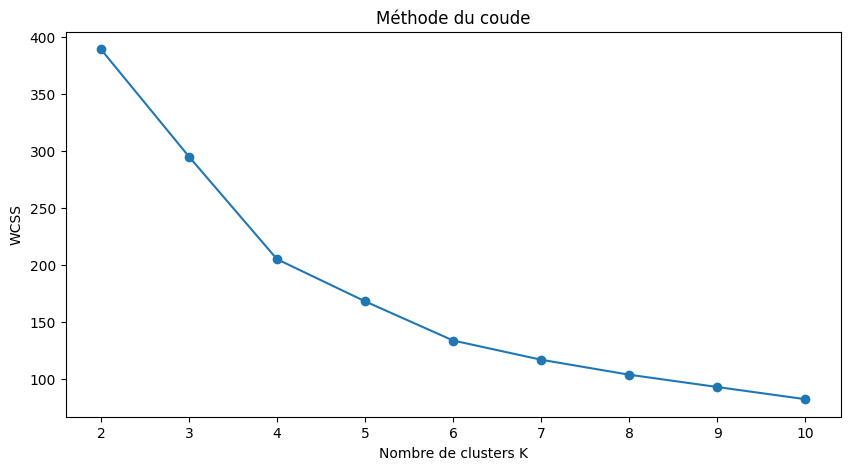

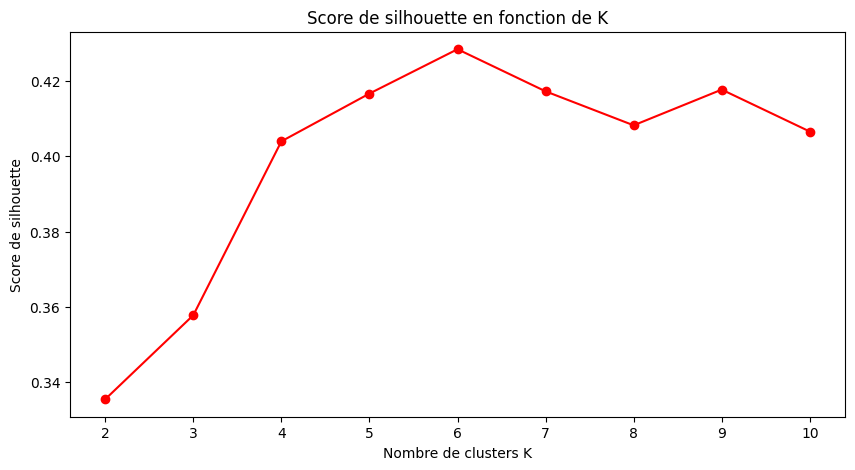

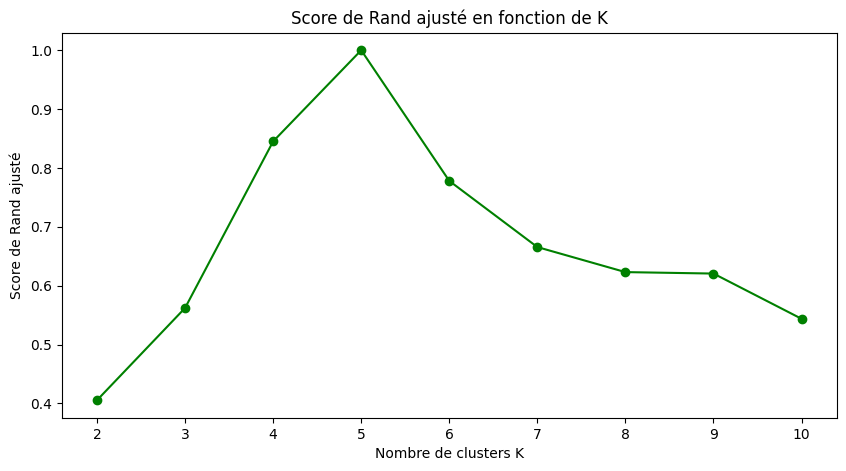

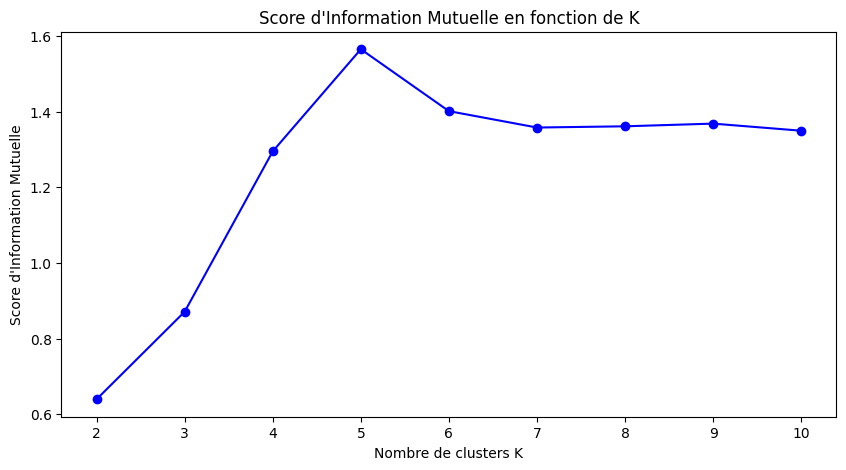

In [58]:
# Expérimenter avec différentes valeurs de K
wcss = []
silhouette_scores = []
ari_scores = []
mi_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, labels))
    ari_scores.append(adjusted_rand_score(df2['Cluster_KMeans'], labels))
    mi_scores.append(mutual_info_score(df2['Cluster_KMeans'], labels))

# Méthode du coude
plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Nombre de clusters K')
plt.ylabel('WCSS')
plt.title('Méthode du coude')
plt.show()

# Score de silhouette pour différentes valeurs de K
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='red')
plt.xlabel('Nombre de clusters K')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction de K')
plt.show()

# Score de Rand ajusté pour différentes valeurs de K
plt.figure(figsize=(10, 5))
plt.plot(k_range, ari_scores, marker='o', color='green')
plt.xlabel('Nombre de clusters K')
plt.ylabel('Score de Rand ajusté')
plt.title('Score de Rand ajusté en fonction de K')
plt.show()

# Score d'Information Mutuelle pour différentes valeurs de K
plt.figure(figsize=(10, 5))
plt.plot(k_range, mi_scores, marker='o', color='blue')
plt.xlabel('Nombre de clusters K')
plt.ylabel('Score d\'Information Mutuelle')
plt.title('Score d\'Information Mutuelle en fonction de K')
plt.show()

**interprétation**

Score de Rand ajusté (ARI) : Il atteint son maximum à
𝐾=5  indiquant que ce nombre de clusters correspond mieux à une structure cohérente des données. Au-delà, la qualité du clustering diminue.

Score de silhouette : Il augmente jusqu'à
K=6 puis fluctue, suggérant que les clusters sont bien séparés jusqu’à un certain point.

Méthode du coude :Le graphique montre une décroissance rapide de WCSS jusqu'à un certain K, puis une diminution plus lente. Le "coude" (point d'inflexion) suggère un
K optimal, souvent autour de 3 ou 4 dans ce cas.

Score d'information Mutuelle : Le score augmente avec K, mais se stabilise après un certain point. Un K optimal est celui où le gain en information mutuelle commence à ralentir, probablement autour de 3 ou 4 clusters.


🔹 Conclusion :

K=5 semble être un choix optimal pour le clustering, car il maximise la cohérence interne (ARI) tout en maintenant une bonne séparation (silhouette).

## Clustering Hierarchique

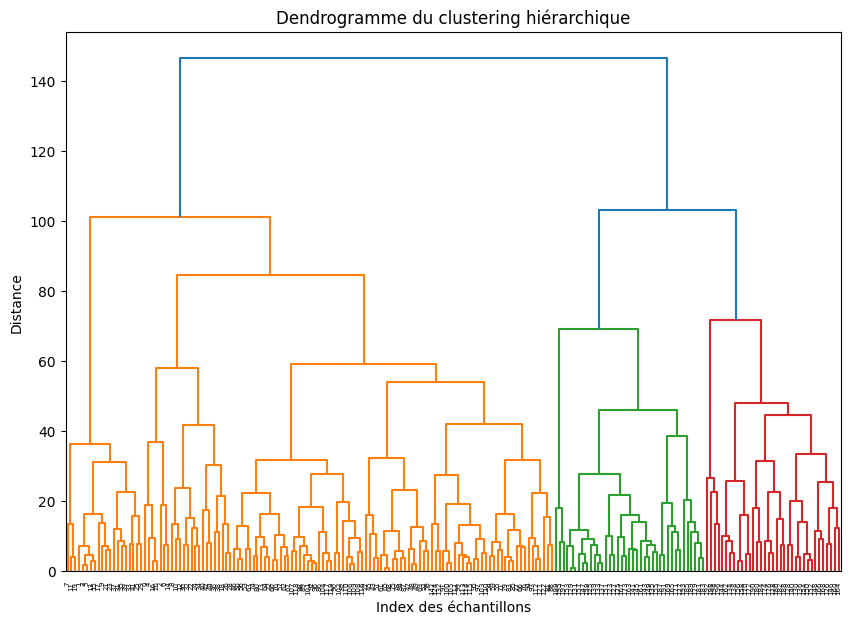

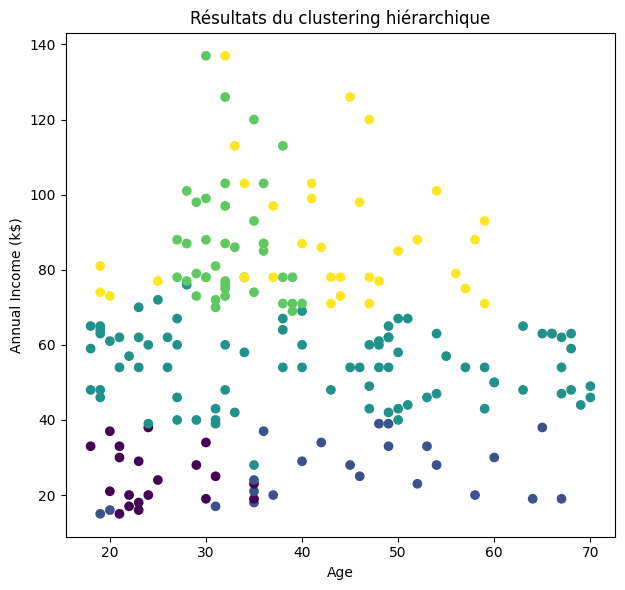

In [66]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster


# Sélection des caractéristiques pertinentes pour le clustering
X = df2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Clustering hiérarchique - Liaison complète
Z = linkage(X, method='complete')

# Tracé du dendrogramme
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogramme du clustering hiérarchique")
plt.xlabel("Index des échantillons")
plt.ylabel("Distance")
plt.show()

# Nombre optimal de clusters
n_clusters_hierarchical = 5

# Application du clustering hiérarchique avec le nombre optimal de clusters
clusters_hierarchical = fcluster(Z, n_clusters_hierarchical, criterion='maxclust')

# Clustering K-means avec le même nombre de clusters
kmeans = KMeans(n_clusters=n_clusters_hierarchical, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

# Visualisation des résultats  du clustering hiérarchique
plt.figure(figsize=(12, 6))



# Subplot pour Clustering hiérarchique
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=clusters_hierarchical, cmap='viridis')
plt.title("Résultats du clustering hiérarchique")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

plt.tight_layout()
plt.show()


**Comparaison**

Segmentation : Les deux méthodes segmentent les clients en groupes cohérents, mais K-means montre une segmentation plus nette en fonction de l'âge et du revenu, tandis que le clustering hiérarchique se concentre davantage sur le revenu annuel.

Structure des clusters : K-means produit des clusters plus distincts et équilibrés, tandis que le clustering hiérarchique peut révéler une structure hiérarchique ou des sous-groupes imbriqués.

## Clustering DBSCAN

Paramètres : eps=0.3, min_samples=5
Nombre de clusters détectés : 11
Nombre de points considérés comme du bruit : 134


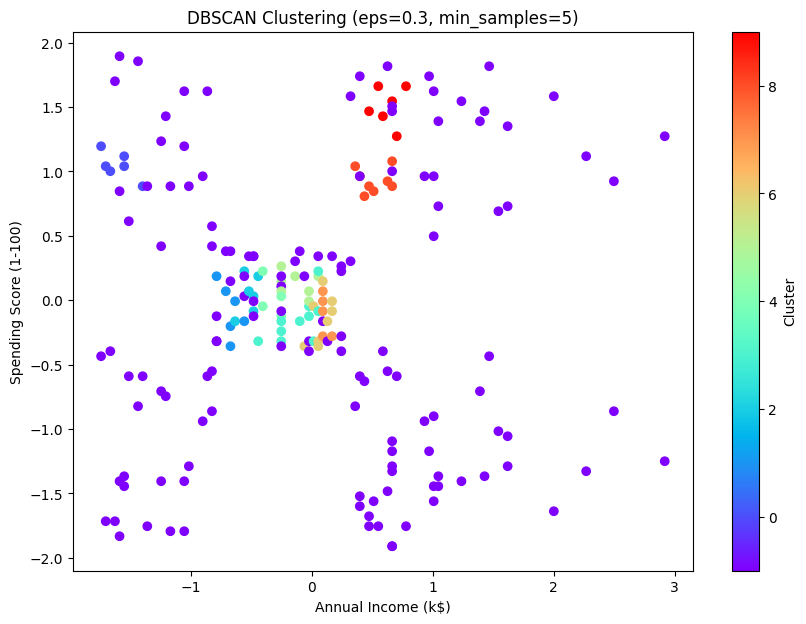

Paramètres : eps=0.3, min_samples=10
Nombre de clusters détectés : 1
Nombre de points considérés comme du bruit : 200


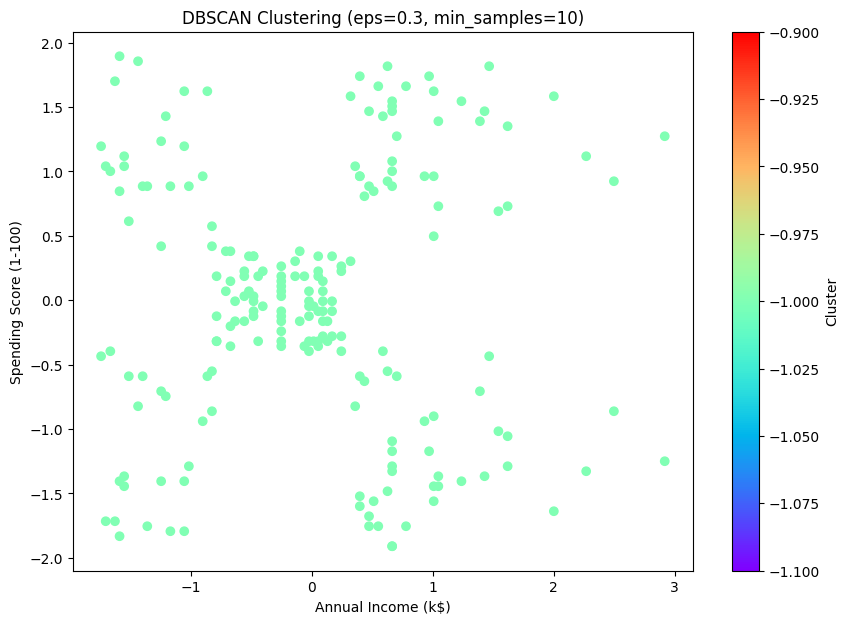

Paramètres : eps=0.3, min_samples=15
Nombre de clusters détectés : 1
Nombre de points considérés comme du bruit : 200


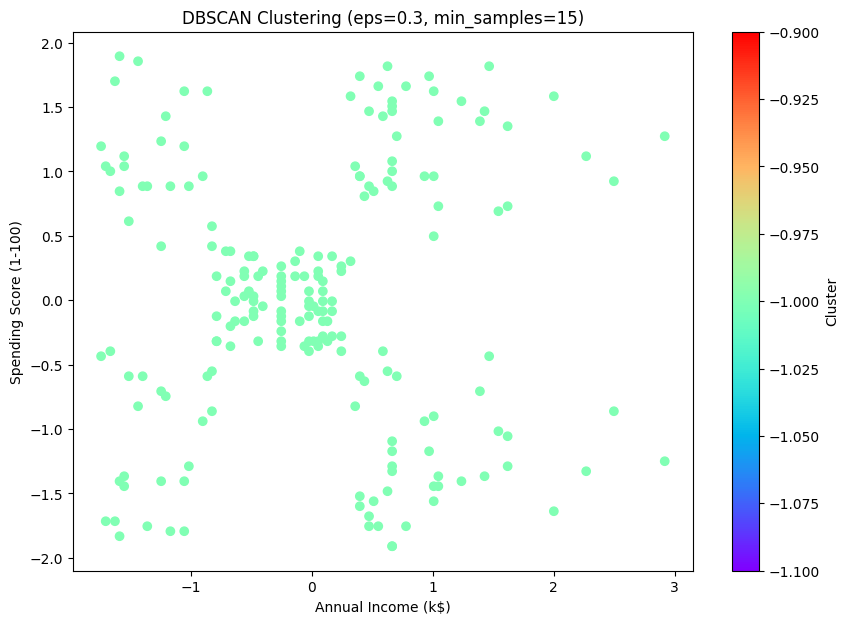

Paramètres : eps=0.5, min_samples=5
Nombre de clusters détectés : 7
Nombre de points considérés comme du bruit : 60


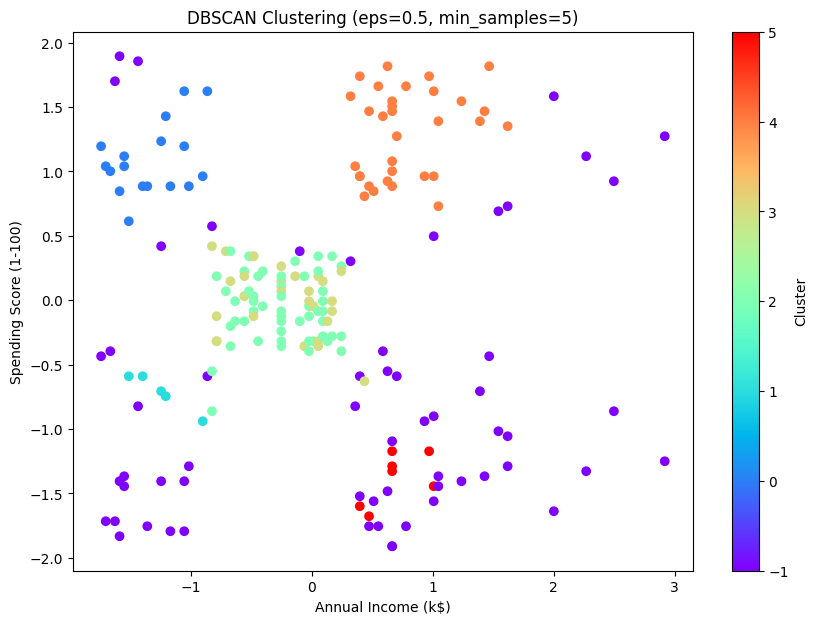

Paramètres : eps=0.5, min_samples=10
Nombre de clusters détectés : 5
Nombre de points considérés comme du bruit : 114


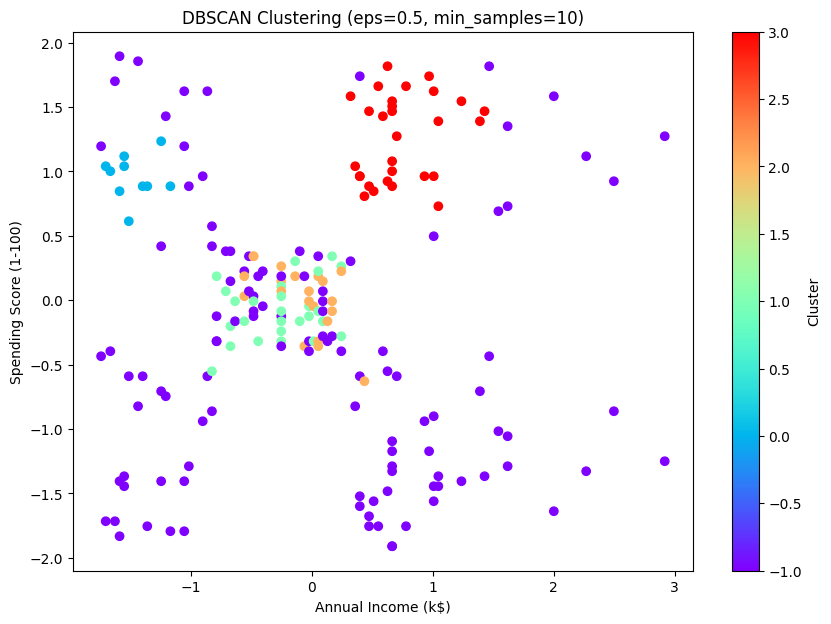

Paramètres : eps=0.5, min_samples=15
Nombre de clusters détectés : 3
Nombre de points considérés comme du bruit : 164


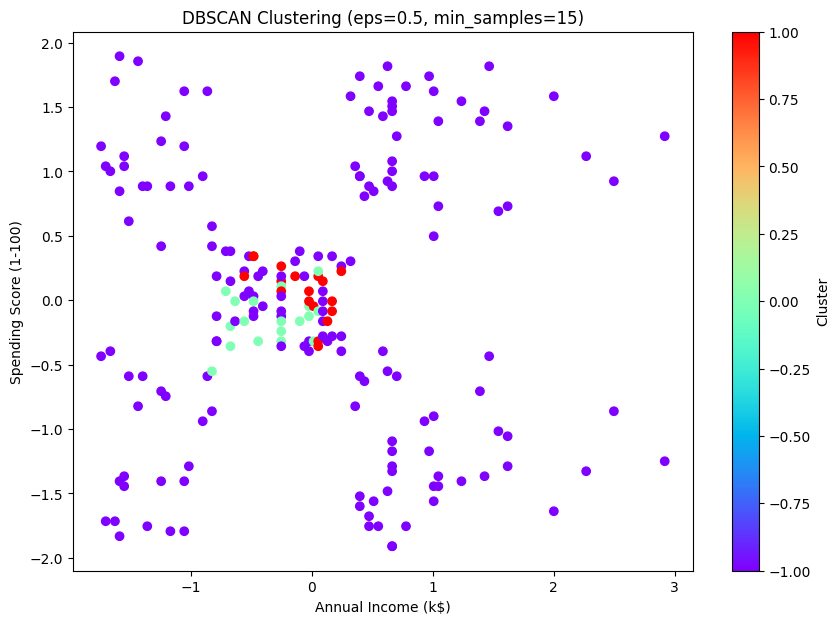

Paramètres : eps=0.7, min_samples=5
Nombre de clusters détectés : 2
Nombre de points considérés comme du bruit : 14


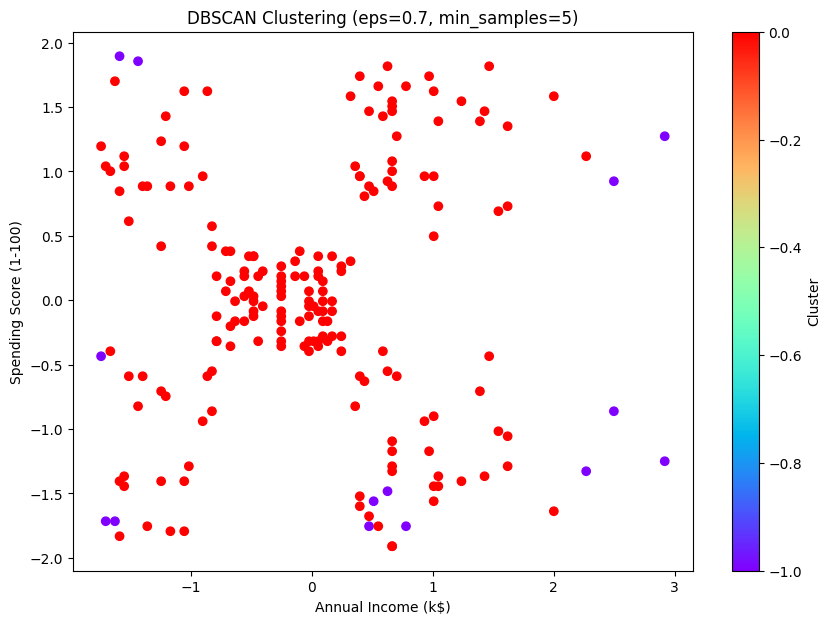

Paramètres : eps=0.7, min_samples=10
Nombre de clusters détectés : 3
Nombre de points considérés comme du bruit : 43


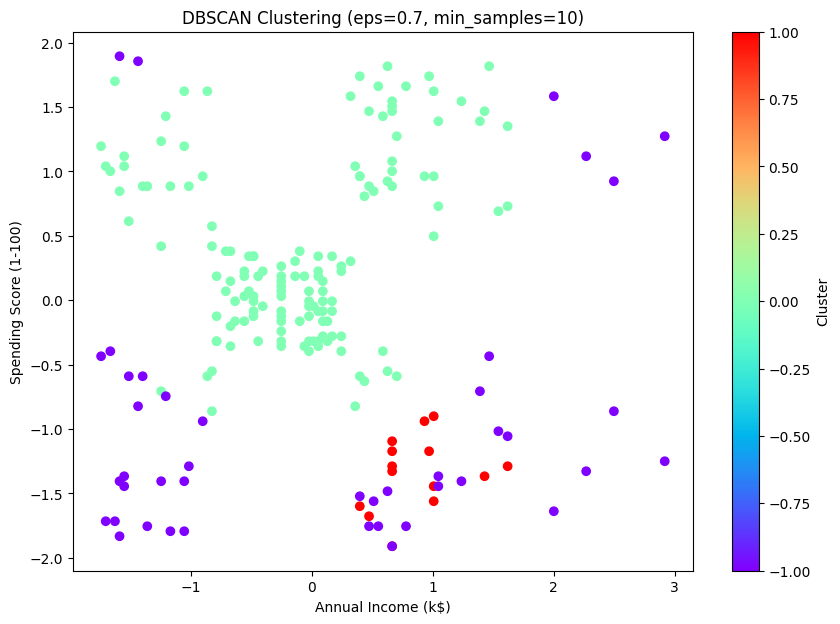

Paramètres : eps=0.7, min_samples=15
Nombre de clusters détectés : 5
Nombre de points considérés comme du bruit : 62


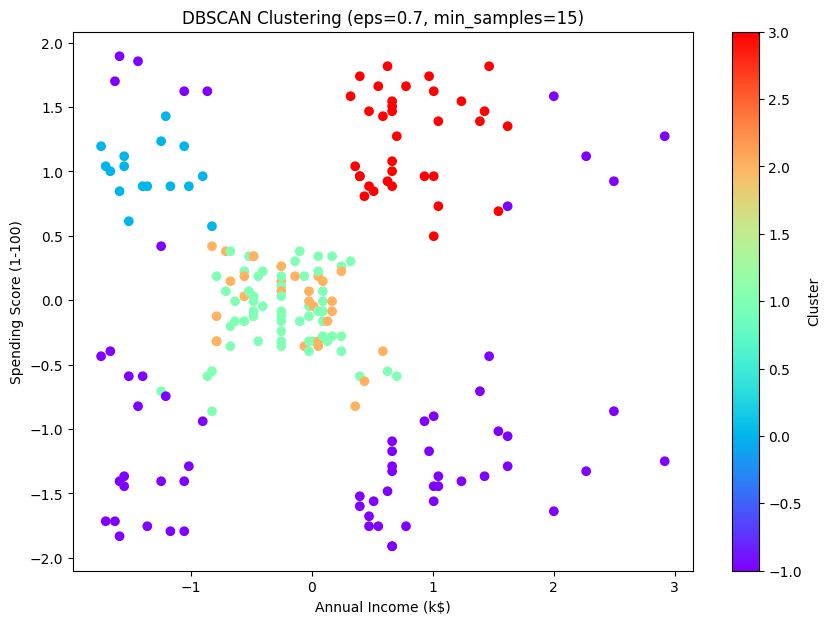

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Sélection des colonnes pertinentes pour le clustering
X = df2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fonction pour appliquer DBSCAN et afficher les résultats
def apply_dbscan(eps, min_samples):
    # Application de DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    df2['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

    # Nombre de clusters détectés (en excluant le bruit)
    n_clusters = len(set(df2['DBSCAN_Cluster'])) - (1 if -1 in df2['DBSCAN_Cluster'] else 0)

    # Nombre de points considérés comme du bruit
    n_noise = list(df2['DBSCAN_Cluster']).count(-1)

    # Affichage des résultats
    print(f"Paramètres : eps={eps}, min_samples={min_samples}")
    print(f"Nombre de clusters détectés : {n_clusters}")
    print(f"Nombre de points considérés comme du bruit : {n_noise}")

    # Visualisation des clusters
    plt.figure(figsize=(10, 7))
    plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=df2['DBSCAN_Cluster'], cmap='rainbow', marker='o')
    plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.colorbar(label='Cluster')
    plt.show()

# Test de DBSCAN avec différents paramètres
eps_values = [0.3, 0.5, 0.7]  # Valeurs de epsilon à tester
min_samples_values = [5, 10, 15]  # Valeurs de min_samples à tester

for eps in eps_values:
    for min_samples in min_samples_values:
        apply_dbscan(eps, min_samples)


## Analyse et Interpretation


**Comparaison des Résultats**

**K-Means :**

A produit 5 clusters bien définis, avec une segmentation claire basée sur l'âge et le revenu annuel.

Le score de silhouette et le score de Rand ajusté suggèrent que K=5 est un choix optimal.

**Clustering Hiérarchique :**

A également produit 5 clusters, mais avec une structure hiérarchique qui pourrait révéler des sous-groupes imbriqués.

Le dendrogramme a permis de visualiser les relations entre les clusters.

**DBSCAN :**

A détecté des clusters basés sur la densité, avec des formes plus flexibles.

A identifié des points de bruit, ce qui est utile pour détecter des outliers.

Le nombre de clusters détectés varie en fonction des paramètres eps et min_samples.

**Avantages et inconvenients + améliorations possibles**

**1. Clustering K-Means**

**Avantages :**

Simple à implémenter et rapide à exécuter.

Produit des clusters bien définis et équilibrés.

Idéal pour des données où les clusters sont sphériques et de taille similaire.

**Inconvénients :**

Nécessite de spécifier le nombre de clusters à l'avance (K).

Sensible aux initialisations aléatoires (peut converger vers des minima locaux).

Ne fonctionne pas bien avec des clusters de formes complexes ou de densités variables.

**Améliorations possibles :**

Utiliser la méthode du coude ou le score de silhouette pour déterminer le nombre optimal de clusters.

Appliquer plusieurs initialisations (n_init) pour améliorer la stabilité des résultats.

Standardiser les données pour éviter que certaines caractéristiques dominent.



**2. Clustering Hiérarchique**

**Avantages :**

Ne nécessite pas de spécifier le nombre de clusters à l'avance.

Produit une structure hiérarchique des clusters, utile pour explorer les relations entre les groupes.

Fonctionne bien avec des clusters de formes variées.

**Inconvénients :**

Coûteux en termes de calcul pour de grands datasets (complexité élevée).

Sensible au choix de la méthode de liaison (simple, complète, moyenne).

Difficile à interpréter avec un grand nombre de points.

**Améliorations possibles :**

Utiliser un dendrogramme pour déterminer le nombre optimal de clusters.

Tester différentes méthodes de liaison pour voir laquelle correspond le mieux aux données.

Réduire la taille du dataset (par exemple, en utilisant un échantillonnage) pour améliorer les performances.

**3. Clustering DBSCAN**

**Avantages :**

Capable de détecter des clusters de formes arbitraires.

Identifie automatiquement les points de bruit (outliers).

Ne nécessite pas de spécifier le nombre de clusters à l'avance.

**Inconvénients :**

Sensible aux paramètres eps et min_samples, qui peuvent être difficiles à choisir.

Moins performant avec des clusters de densités très différentes.

Peut mal fonctionner si les données ne sont pas bien normalisées.

**Améliorations possibles :**

Tester plusieurs valeurs de eps et min_samples pour trouver les meilleurs paramètres.

Utiliser une visualisation des distances (par exemple, un graphique des k-plus proches voisins) pour choisir eps.

Standardiser les données pour améliorer les performances.







**Conclusion**


Le choix de la méthode de clustering dépend des objectifs de l'analyse et des caractéristiques des données. Pour le dataset "Mall Customers", K-Means semble être un bon choix pour une segmentation rapide et claire, tandis que DBSCAN est utile pour détecter des clusters de formes complexes et des outliers. Le clustering hiérarchique est intéressant pour explorer des structures hiérarchiques, mais il est moins adapté aux grands datasets.
